# Torch Multilayer Perceptron

- We create a two classes dataset with random data, we make sure to make it non linear separable.
- We use a simple architecture of a MLP with three layers: 2 - 16 - 2 - 1.
- We make use of ReLu as the activation function.


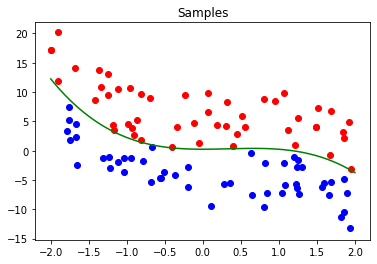

In [2]:
"""Random data creation, two non linearly separable classes.
"""
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(5)

# lets define a boundary given by x^2 - x^3 + 0.5
f = lambda x: x**2 - x**3 + 0.25

x_positive = 4*np.random.rand(50)-2
y_positive = f(x_positive) + 10*np.random.rand(50)

x_negative = 4*np.random.rand(50)-2
y_negative = f(x_negative) - 10*np.random.rand(50)

x = np.asarray(
    [np.concatenate(
        (x_positive,
         x_negative)),
     np.concatenate(
         (y_positive,
          y_negative))
     ]).transpose(1,0)

t = np.asarray([1,]*x_positive.shape[0] + [0,]*x_negative.shape[0])

plt.title("Samples")
plt.scatter(x_positive, y_positive, color='red')
plt.scatter(x_negative, y_negative, color='blue')
plt.plot(np.linspace(-2,2,200), f(np.linspace(-2,2,200)), color='green')

In [3]:
"""Data preparation."""

mus = np.mean(x, axis = 0)
sigma = np.std(x, axis = 0)
xn = (x-mus)/sigma

In [4]:
"""Building the neural network. """
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLP1(nn.Module):

    def __init__(self):
        super(MLP1, self).__init__()
        # The Perceptron also called Fully Connected are Linear layers in Torch
        self.layer1 = nn.Linear(2, 16)
        self.layer2 = nn.Linear(16, 2)
        self.layer3 = nn.Linear(2, 1)

    def forward(self, x):
        y = F.relu(self.layer1(x))
        y = F.relu(self.layer2(y))
        y = F.sigmoid(self.layer3(y))
        return y

mdl = MLP1()
print(mdl)

MLP1(
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=2, bias=True)
  (layer3): Linear(in_features=2, out_features=1, bias=True)
)


Loss: 0.26051491498947144 ... 0.17171959578990936
Acc: 0.5 ... 0.8700000047683716


/home/alexanderp/.local/lib/python3.8/site-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


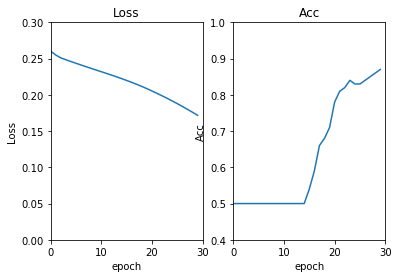

In [5]:
""" Training
- Define a Loss Function -- Criterion.
- Define the number or epochs(iterations).
- We use an optimizer to take care of the weights update.
- Define a lr.
- We will record the loss function.
- We will measure the accuracy at each epoch.
"""
import torch.optim as optim

torch.manual_seed(5)

mdl = MLP1()
# We start with MSE -- L_2
criterion = nn.MSELoss()
epochs = 30
lr = 0.4
optimizer = optim.SGD(mdl.parameters(), lr=lr)

# We load our examples in tensors
x = torch.tensor(xn, dtype=torch.float)
target = torch.reshape(torch.tensor(t, dtype=torch.float), (-1, 1))

thre_val = 0.5 # The threshold value
list_loss = []
list_acc = []
for epoch in range(epochs):
    optimizer.zero_grad()
    y = mdl(x)
    loss = criterion(y, target)
    loss.backward()
    optimizer.step()
    # Now we compute the accuracy
    pred = torch.ge(y, thre_val)
    acc = torch.sum(pred == target)/target.shape[0]
    list_loss.append(loss.item())
    list_acc.append(acc.item())

    
figs, axs = plt.subplots(1, 2)
axs[0].plot(range(epochs), list_loss)
axs[0].set_aspect('auto')
axs[0].set(xlim=[0, epochs], ylim=[0, 0.3])
axs[0].set(title='Loss',
           xlabel='epoch',
           ylabel='Loss')

axs[1].plot(range(epochs), list_acc)
axs[1].set(xlim=[0, epochs], ylim = [0.4, 1])
axs[1].set(title='Acc',
           xlabel='epoch',
           ylabel='Acc')
print(f"Loss: {list_loss[0]} ... {list_loss[-1]}")
print(f"Acc: {list_acc[0]} ... {list_acc[-1]}")

In [6]:
"""
Test
For the test we create a new set of samples, we know the formula.
"""

x_test_positive = 4*np.random.rand(10) - 2
y_test_positive = f(x_test_positive) + 5*np.random.rand(10)
x_test_negative = 4*np.random.rand(10) - 2
y_test_negative = f(x_test_negative) - 5*np.random.rand(10) 

x_test = np.asarray(
    [np.concatenate(
        (x_test_positive,
         x_test_negative)),
     np.concatenate(
         (y_test_positive,
          y_test_negative))
     ]).transpose(1,0)

t_test = np.asarray([1,]*x_test_positive.shape[0] + [0,]*x_test_negative.shape[0])


xn_test = (x_test - mus)/sigma

y_test = mdl(torch.tensor(xn_test,dtype=torch.float)).detach().numpy()

Accuracy: 0.8


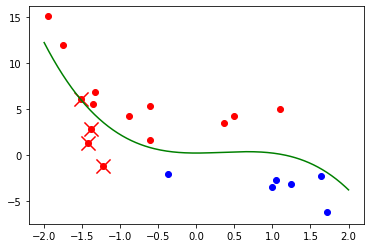

In [7]:
"""
Prediction and measure using the previously created data.
"""

pred = np.heaviside(y_test-thre_val, 0).reshape(-1)
x_pred_pos = x_test[pred==1]
x_pred_neg = x_test[pred==0]

x_fp = x_test[ (pred==1) & (t_test==0) ]
x_fn = x_test[ (pred==0) & (t_test==1) ]

acc = np.sum(t_test == pred)/t_test.shape[0]
print(f"Accuracy: {acc}")

plt.scatter(x_pred_pos[:,0], x_pred_pos[:, 1], color = 'red')
plt.scatter(x_pred_neg[:,0], x_pred_neg[:, 1], color='blue')

plt.scatter(x_fp[:,0], x_fp[:,1], color='red', marker='x',s=200)
plt.scatter(x_fn[:,0], x_fn[:,1], color='blue', marker='x', s=200)

plt.plot(np.linspace(-2,2,200), f(np.linspace(-2,2,200)), color='green')

# Tensorflow + Keras

Now we are going to use the intuitive high-level API of keras.

- We use a simple architecture of a MLP with three layers: 2 - 16 - 2 - 1.
- We make use of ReLu as the activation function.

In [10]:
"""Building the neural network."""

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# We pack our model in a Sequential Classa

tf.random.set_seed(5)

mdl = Sequential()
mdl.add(Dense(16, input_dim = 2, activation='relu'))
mdl.add(Dense(2, activation='relu'))
mdl.add(Dense(1, activation='sigmoid'))

mdl.compile(loss='mse',
            optimizer= tf.keras.optimizers.SGD(
                learning_rate=0.4,
                name="SGD"),
            metrics=['accuracy'])

mdl.fit(xn, t, epochs=30)

Epoch 1/30
4/4 [==============================] - 0s 815us/step - loss: 0.2583 - accuracy: 0.4800
Epoch 2/30
4/4 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.4800
Epoch 3/30
4/4 [==============================] - 0s 809us/step - loss: 0.2394 - accuracy: 0.6900
Epoch 4/30
4/4 [==============================] - 0s 1ms/step - loss: 0.2148 - accuracy: 0.8700
Epoch 5/30
4/4 [==============================] - 0s 820us/step - loss: 0.1924 - accuracy: 0.8400
Epoch 6/30
4/4 [==============================] - 0s 837us/step - loss: 0.1754 - accuracy: 0.7800
Epoch 7/30
4/4 [==============================] - 0s 1ms/step - loss: 0.1598 - accuracy: 0.8900
Epoch 8/30
4/4 [==============================] - 0s 1ms/step - loss: 0.1471 - accuracy: 0.8800
Epoch 9/30
4/4 [==============================] - 0s 1ms/step - loss: 0.1374 - accuracy: 0.8700
Epoch 10/30
4/4 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9000
Epoch 11/30
4/4 [==============

Accuracy: 0.85


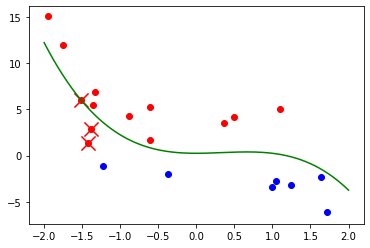

In [9]:
"""
Test
For the previously created data.
"""

y_test = mdl.predict(x_test)
pred = np.heaviside(y_test-thre_val, 0).reshape(-1)
x_pred_pos = x_test[pred==1]
x_pred_neg = x_test[pred==0]

x_fp = x_test[ (pred==1) & (t_test==0) ]
x_fn = x_test[ (pred==0) & (t_test==1) ]

acc = np.sum(t_test == pred)/t_test.shape[0]
print(f"Accuracy: {acc}")

plt.scatter(x_pred_pos[:,0], x_pred_pos[:, 1], color = 'red')
plt.scatter(x_pred_neg[:,0], x_pred_neg[:, 1], color='blue')

plt.scatter(x_fp[:,0], x_fp[:,1], color='red', marker='x',s=200)
plt.scatter(x_fn[:,0], x_fn[:,1], color='blue', marker='x', s=200)

plt.plot(np.linspace(-2,2,200), f(np.linspace(-2,2,200)), color='green')